<a href="https://colab.research.google.com/github/rony23-byte/econometrics/blob/main/Econometrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing **libaries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,metrics
from sklearn.linear_model import LinearRegression

Loading the dataset


In [ ]:
econmetrics=pd.read_csv("/content/ beauty.csv")
econmetrics.head()
df=pd.DataFrame(econmetrics)
print(df)
 
 

       wage  exper  looks  union  goodhlth  black  female  married  south  \
0      5.73     30      4      0         1      0       1        1      0   
1      4.28     28      3      0         1      0       1        1      1   
2      7.96     35      4      0         1      0       1        0      0   
3     11.57     38      3      0         1      0       0        1      0   
4     11.42     27      3      0         1      0       0        1      0   
...     ...    ...    ...    ...       ...    ...     ...      ...    ...   
1255   1.61     25      3      0         1      1       1        0      0   
1256   1.68      4      2      0         1      0       1        1      0   
1257   3.29     35      3      0         1      1       1        0      0   
1258   2.31     15      3      0         1      1       1        1      0   
1259   1.92     24      3      0         0      0       1        0      1   

      bigcity  smllcity  service  educ  
0           0         1        1  

dropping missing values 

defining the feature matrix and the response variable

In [ ]:
 #dropping the unecessary features 
 df2.drop(df2.columns[[3 , 4,5,6,7,8,9,10,11]], axis=1, inplace=True)
  
df2


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,wage,exper,looks,educ
0,5.73,30,4,14
1,4.28,28,3,12
2,7.96,35,4,10
3,11.57,38,3,16
4,11.42,27,3,16


In [ ]:
zz

    wage  exper  looks  union  goodhlth  black  female  married  south  \
0   5.73     30      4      0         1      0       1        1      0   
1   4.28     28      3      0         1      0       1        1      1   
2   7.96     35      4      0         1      0       1        0      0   
3  11.57     38      3      0         1      0       0        1      0   
4  11.42     27      3      0         1      0       0        1      0   

   bigcity  smllcity  service  educ  
0        0         1        1    14  
1        0         1        0    12  
2        0         1        0    10  
3        1         0        1    16  
4        0         1        0    16  


In [ ]:
x=df2.drop(['wage'],axis=1).values
y=df2['wage'].values

In [ ]:
print(x)


[[30  4 14]
 [28  3 12]
 [35  4 10]
 [38  3 16]
 [27  3 16]]


In [ ]:
 print(y)

[ 5.73       4.2800002  7.96      11.57      11.42     ]


Split dataset into training set and test set 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

**Train the Model on the training set  **


In [ ]:
ml=LinearRegression()
ml.fit(x_train,y_train)
 

LinearRegression()

Estimating the model


In [ ]:
y_pred=ml.predict(x_test)
print(y_pred)

[0.79863666 7.88409101]


This predicts

Checking the accuracy of our model


In [ ]:
 #printing the beta note, coefficeints and score
 print(ml.intercept_,ml.coef_,ml.score(x,y))
 
 

-17.562726472727284 [0.01363636 0.         1.78840904] -0.29307260353692444


In [ ]:
 #printing the beta note, coefficeints and score
 print(ml.intercept_,ml.coef_,ml.score(x,y))
 
 

-17.562726472727284 [0.01363636 0.         1.78840904] -0.29307260353692444


In [ ]:
y_pred=ml.predict(x_test)
print(y_pred)

[0.79863666 7.88409101]


In [ ]:
y_pred=ml.predict(x_test)
print(y_pred)

[0.79863666 7.88409101]


In [ ]:
#model evaluation
from sklearn import metrics
#print results of the metrics
print(metrics.mean_absolute_error(y_test,y_pred))
#print the result of the mean squared error
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


4.657727172727274
27.962616455429796
5.287969029356147


Feature: 0, Score: 0.01364
Feature: 1, Score: 0.00000
Feature: 2, Score: 1.78841


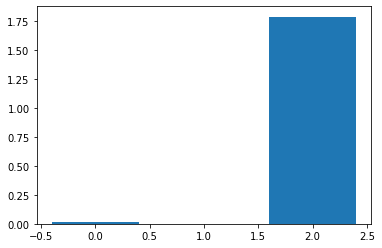

In [ ]:
# get importance
importance = ml.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

multi_model = ols('wage ~ looks+educ+exper',
                   data=df2).fit()
print(multi_model)


/usr/local/lib/python3.8/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                 -0.608
Method:                 Least Squares   F-statistic:                    0.4960
Date:                Tue, 24 Jan 2023   Prob (F-statistic):              0.749
Time:                        13:37:34   Log-Likelihood:                -10.210
No. Observations:                   5   AIC:                             28.42
Df Residuals:                       1   BIC:                             26.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.5042     27.680     -0.343      0.7

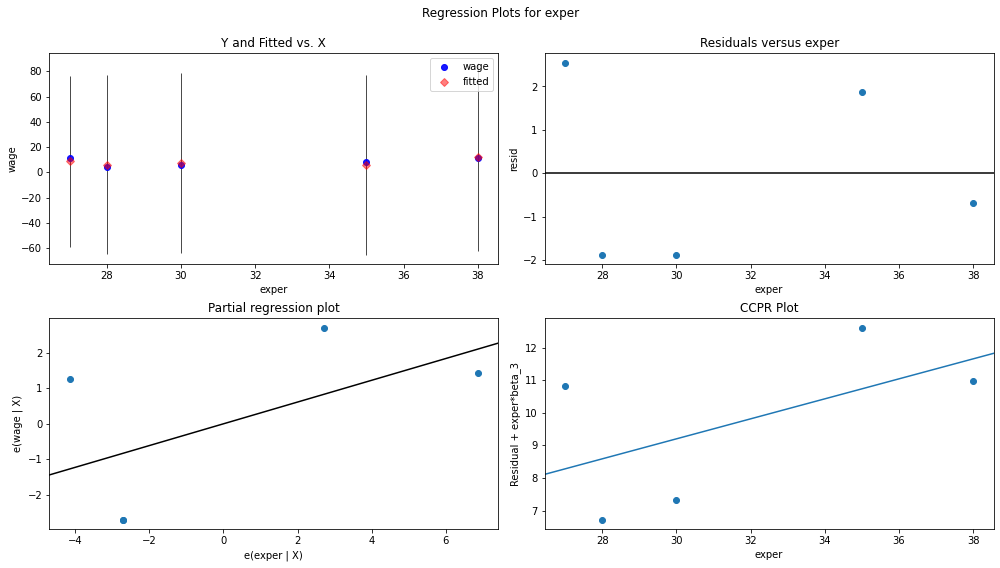

In [ ]:
print(multi_model.summary())
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(multi_model, 'exper', fig=fig)

Text(0.5, 1.0, 'Actual vs Predicted')

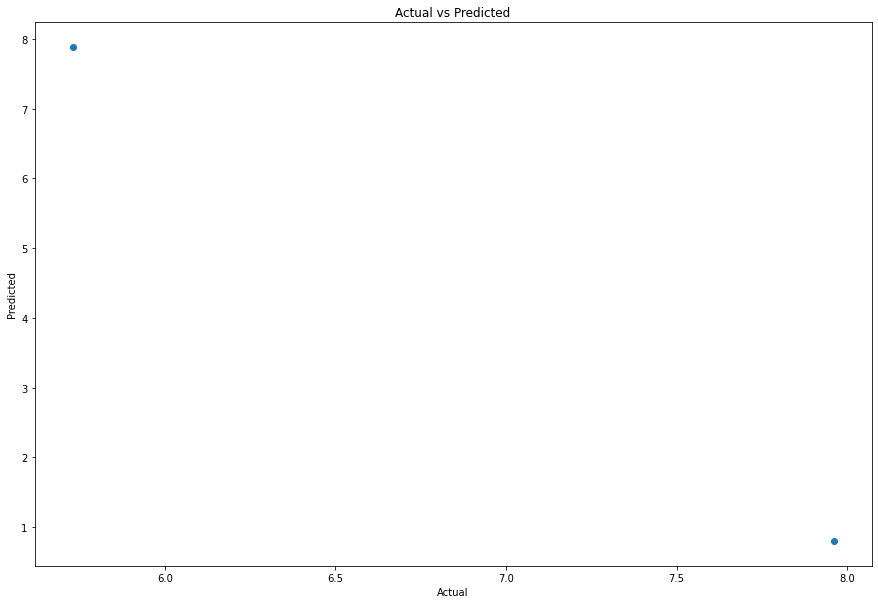

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')